# Presentacion 2

In [22]:
%matplotlib inline
import gc
import pandas as pd
import glob
import sklearn
import numpy as np
import matplotlib

## 1. Archivos de lectura

In [2]:
dcFiles=glob.glob("../data/Dc/*")
dcFiles

['../data/Dc/Jnk.csv',
 '../data/Dc/CTNNB1.csv',
 '../data/Dc/LEF1.csv',
 '../data/Dc/Ikk2.csv',
 '../data/Dc/Erk.csv',
 '../data/Dc/MYC.csv',
 '../data/Dc/IRF4.csv']

In [3]:
trainIndexFiles=glob.glob("../Train/*")
frames = list()
for f in trainIndexFiles:
    indices = pd.read_csv(f,sep=";")
    indexList=list(indices['0'])
    protein = f.split("/")[-1].split(".")[0]
    fpath = '../data/Dc/'+f.split("/")[-1].split(".")[0]+".csv"
    dcRead = pd.read_csv(fpath,sep=";")
    dcPartialTrain=dcRead[dcRead.columns[5:]].loc[indexList].copy()
    dcPartialTrain.insert(0,column='Protein',value =protein )
    del dcRead
    gc.collect()
    frames.append(dcPartialTrain)

In [4]:
dcTrain = pd.concat(frames)

In [5]:
lstn_clusters=range(2,5)

## 2. Clustering

In [25]:
import time
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

In [26]:
file = open('../ClusteringOutputs/DC_Clustering/dcMiniBatch.txt','w')  
bestOut = open('../ClusteringOutputs/DC_Clustering/dcBestMiniBatch.txt','w') 
file.write("n_clusters,s_score\n")

19

In [27]:
dfLabels=pd.DataFrame()

In [28]:
dfLabels['Protein'] = dcTrain['Protein'].tolist()

### 2.1 Aplicando MiniBatch

In [40]:
%%latex
Silhouette Score $S(i)$:
    
$$S(i) = \frac{b(i)-a(i)}{max{(a(i),b(i))}} $$

<IPython.core.display.Latex object>

In [29]:
max_silhouette=0
nClusters=2

for n in lstn_clusters:
    mbk=MiniBatchKMeans(init='k-means++', n_clusters=n
                        , max_no_improvement=10, verbose=0)
    mbk.fit(dcTrain[dcTrain.columns[1:]])
    labels = mbk.labels_
    s_score = silhouette_score(dcTrain[dcTrain.columns[1:]], labels, metric='euclidean')
    dfLabels['NClusters'+str(n)] = n
    dfLabels['Labels_'+str(n)] =labels
    file.write(str(n)+",")
    file.write(str(s_score)+"\n")
    if s_score>max_silhouette:
        max_silhouette = s_score
        nClusters=n
#t_mini_batch = time.time() - t0    
#print("Num clusters " + str(n))
bestOut.write("Num clusters " + str(n))
#print("Silhouette score " + str(max_silhouette))
bestOut.write("Silhouette score " + str(max_silhouette))
#print("Running time " + str(t_mini_batch))
file.close()
bestOut.close()
file.close()
bestOut.close()

In [30]:
dfLabels.head()

,Protein,NClusters2,Labels_2,NClusters3,Labels_3,NClusters4,Labels_4
0,CTNNB1,2,0,3,1,4,1
1,CTNNB1,2,0,3,1,4,1
2,CTNNB1,2,0,3,1,4,0
3,CTNNB1,2,0,3,1,4,1
4,CTNNB1,2,0,3,0,4,3


In [13]:
mbk=MiniBatchKMeans(init='k-means++', n_clusters=4
                        , max_no_improvement=10, verbose=0)
mbk.fit(dcTrain[dcTrain.columns[1:]])
labels = mbk.labels_
s_score = silhouette_score(dcTrain[dcTrain.columns[1:]], labels, metric='euclidean')

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(n_components=3, svd_solver='full')

In [17]:
pca.fit(dcTrain[dcTrain.columns[1:]])

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='full', tol=0.0, whiten=False)

In [18]:
pca_3d = pca.transform(dcTrain[dcTrain.columns[1:]]).T

## 3. Plot de DC

In [19]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

In [20]:
x=pca_3d[0]
y=pca_3d[1]
z=pca_3d[2]

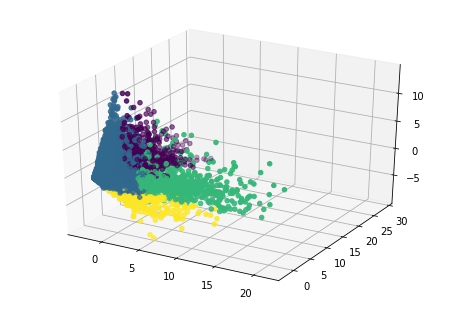

In [21]:
fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z,c=labels)
pyplot.show()